 Predicting House Prices Using Linear Regression Model (Machine Learning)

In [2]:
# Import python data analysis and visualization packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

How to get the Data:

In [3]:
housing = pd.read_csv('USA_Housing.csv') # Import the data from the csv file.

In [4]:
housing.head() # Check the head of the data; the columns and the first five rows, just to get an idea of what kind of 
# data we are working with.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Checking out the Data:


In [5]:
housing.info() # Provides basic information about the dataframe such as number of records, number of columns,
# data types, etc...
'''
Avg. Area Income  ($)                
Avg. Area House Age  (yrs)           
Avg. Area Number of Rooms   (sq ft)  
Avg. Area Number of Bedrooms (sq ft)  
Area Population  (per unit area or volume)               
Price  ($)                         
Address 

''' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


'\nAvg. Area Income  ($)                \nAvg. Area House Age  (yrs)           \nAvg. Area Number of Rooms   (sq ft)  \nAvg. Area Number of Bedrooms (sq ft)  \nArea Population  (per unit area or volume)               \nPrice  ($)                         \nAddress \n\n'

In [6]:
round(housing.describe(), 2) # Provides us the basic stats of each numerical feature (column).
# Rounded to two decimal places.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


Exploratory Data Analysis (EDA):

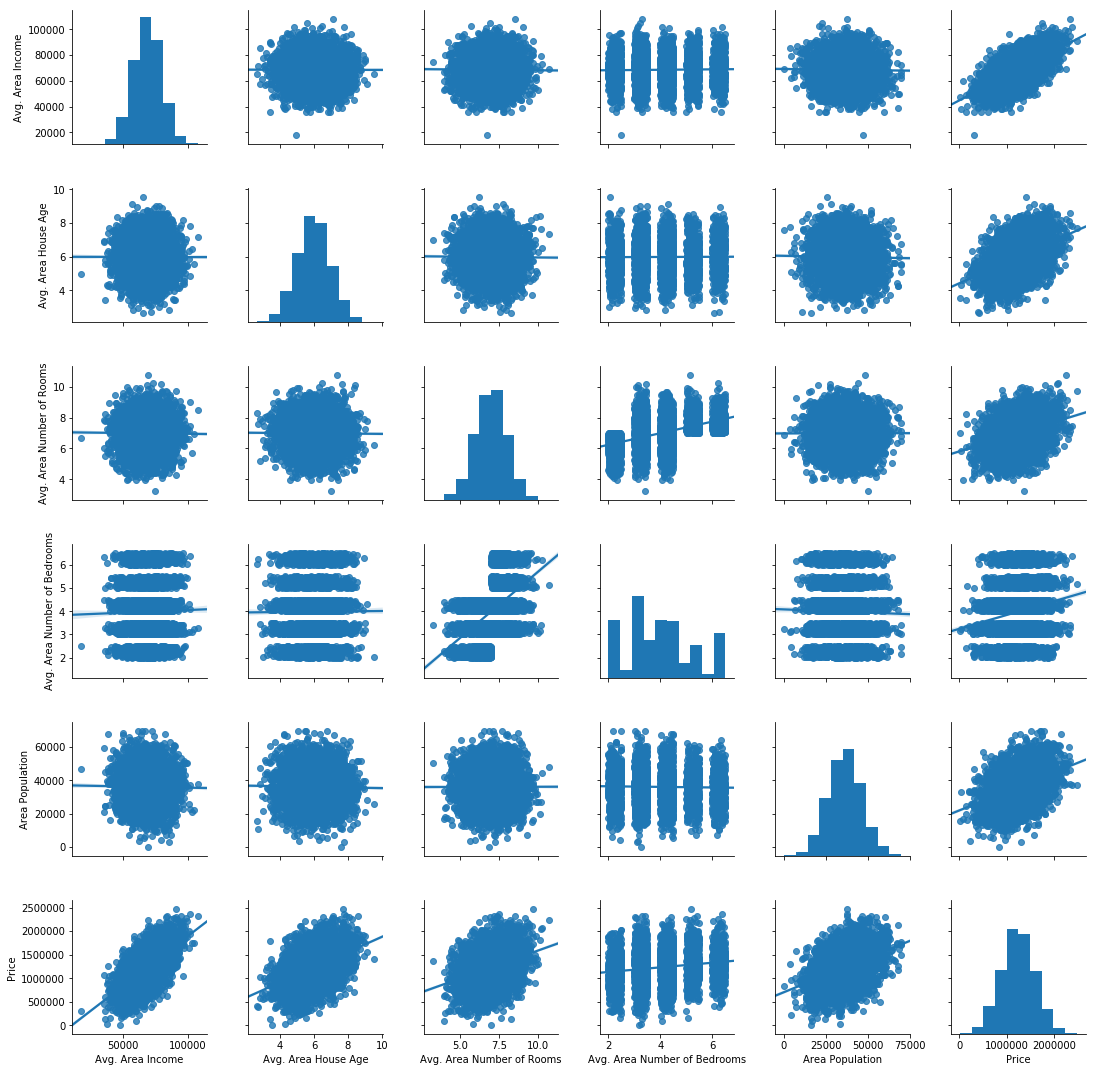

In [8]:
sns.pairplot(data=housing,palette= 'muted',kind='reg') 
# This pairplot gives us an big picture-- how each feature correlates with one another.

Based on the pairplot above, we can see that we should focus on: Avg. Area Income, Avg Area House Age, Avg Area Number of Rooms, and Area Population since these variables seem to correlate with the price of the house to some extent, which is what I am measuring in this project.

To further narrow down which features would most correlate with the housing price, I used
the joint plot to measure each feature against the price variable.

Avg. Area Income vs. Price

In [104]:
sns.set_palette("colorblind") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

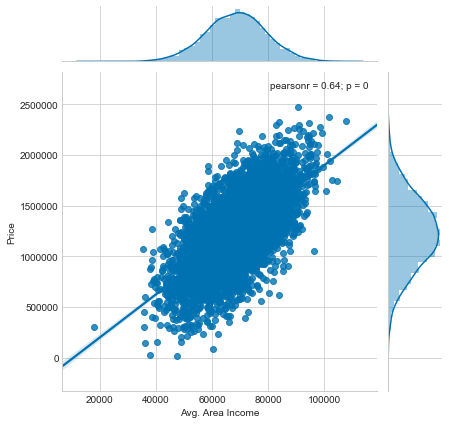

In [105]:
sns.jointplot(x='Avg. Area Income', y= 'Price', data=housing,kind='reg') 

Avg. Area House Age vs. Price

In [106]:
sns.set_palette("muted") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

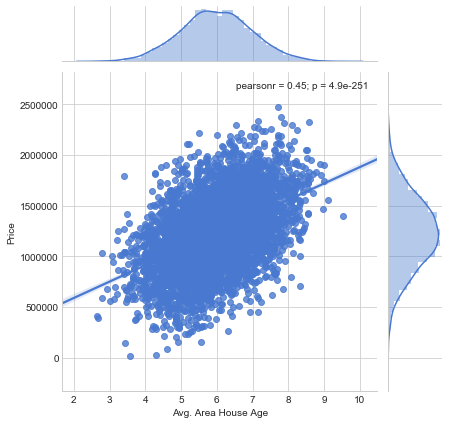

In [107]:
sns.jointplot(x='Avg. Area House Age', y= 'Price', data=housing,kind='reg')

Avg. Area Number of Rooms vs. Price

In [108]:
sns.set_palette("RdYlBu_r") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

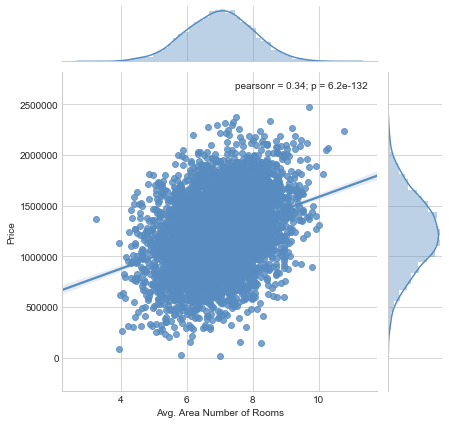

In [109]:
sns.jointplot(x='Avg. Area Number of Rooms', y= 'Price', data=housing,kind='reg')  

Area Population vs. Price

In [110]:
sns.set_palette("bwr_r") # set the color of the figure
sns.set_style('whitegrid')  # set the style of the figure

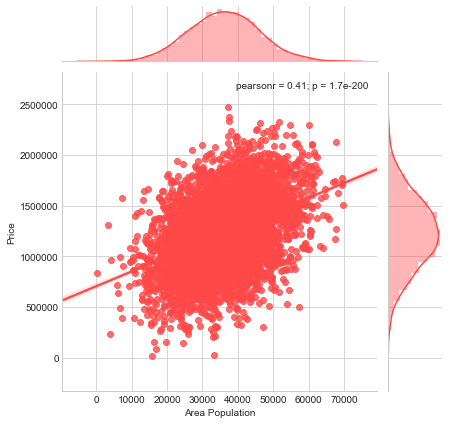

In [111]:
sns.jointplot(x='Area Population', y= 'Price', data=housing,kind='reg')

Based on the four joint plots above, we can obviously see the strongest correlation between Avg. Area Income and Price, with the pearson correlation coefficent = 0.64; a postive correlation.
This means that as the average area income increases, we will see an increase in the housing price as well.

NOTE: can also using a linear regression plot to take a closer look at the correlation between Avg. Area Income and Price

sns.lmplot(x='Avg. Area Income',y='Price', data=housing)

Training and Testing the Data: going to split data into training and testing data sets

In [112]:
y = housing['Price']

In [113]:
X = housing[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]

Use the model_selection.train_test_split from sklearn to SPLIT the data into training and testing sets. 

Set test_size=0.3 and random_state=101 (so others who train and test this model will get same results)

Test size: 30% and Training size: 70%

In [114]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =101)

TRAIN our model now by Importing LinearRegression from sklearn.linear_model

In [118]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [119]:
lm = LinearRegression()

Train/fit lm on the training data

In [120]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Print coefficients of the model for more information. The coefficient(s) represents the slope(s) of the graph for each feature.

NOTE: These coefficients are in in exponent form (e^)

In [121]:
print('Coefficients: \n', lm.coef_) # These coefficients correspond to the X-train columns/features.

Coefficients: 
 [2.16186171e+01 1.65268963e+05 1.22155472e+05 1.52203908e+01]


As we can see above, the Avg. Area Income vs. Price results in steepest slope ($21.62/unit). 

What it means: 

A 1 unit increase in the Avg Area Income is associated with a $21.62 increase in the price of the house. 
(Assuming we hold all other featured fixed)

In [122]:
print('Intercepts: \n',lm.intercept_)

Intercepts: 
 -2641562.1663696812


Above, is the y-intercept (where the line crosses the y-axis of the linear regression plot)

Predicting the TEST data: predicting off of the test values!

In [123]:
predictions = lm.predict( X_test)

Creating a scatter plot real test values vs. predicted values

Text(0,0.5,'Predictions')

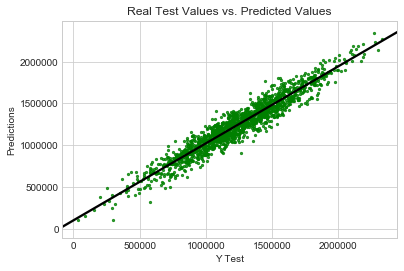

In [124]:
sns.regplot(y_test,predictions,scatter_kws={"color": "green","s": 5}, line_kws={"color": "black"}, 
            marker='o')
plt.title('Real Test Values vs. Predicted Values')
plt.xlabel('Y Test')
plt.ylabel('Predictions')

Evaluating the Linear Model:

Evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [125]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # Mean Average Error-easiest to understand because it's
#the average error
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # Mean Squared Error- punisheds large errors
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # Root Mean Squared Error-is most popular 
#because RMSE is interpretable in the "y" units.

MAE: 81268.89606138287
MSE: 10174437569.110308
RMSE: 100868.41710421705


Residuals: Explore the residuals by plotting a histogram of the residuals to make sure it looks normally distributed = means everything was okay with our data and that we got a very good fit.

Residual (Error) are the differences between observed and predicted values of data. Residuals are used to assess the quality of a model. 

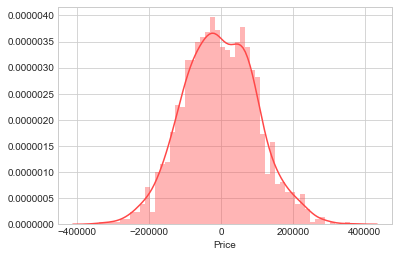

In [126]:
sns.distplot((y_test-predictions),bins=50); # We got a pretty normally distributed plot

Conclusion:

In [127]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Area Income,21.618617
Avg. Area House Age,165268.963373
Avg. Area Number of Rooms,122155.471708
Area Population,15.220391


Interpreting the coefficients: Holding all other features fixed

1 unit increase in Avg. Area Income is associated with an increase of $21.62 price of the house.

1 unit increase in Avg. Area House Age is associated with an increase of $165,268.96 price of the house.

1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122,155.47 price of the house.

1 unit increase in Area Population is associated with an increase of $15.22 price of the house.


Conclusion: Avg. Area House Age and Avg. Area Number of Rooms seem to be the most important factors in determining the price of a house according to this model.